Study of the faisability of the graph representing actors who played in movies from several countries
This plot will be a map of the world in which two countries will be linked if an actor played in movies produced by both countries
First, we need to look at the number of actors who played in different countries
Then, we will look at the number of countries that are being considered

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_folder = '../../data/cleanData/'
characters_df = pd.read_csv(data_folder + 'characters_cleaned.csv')
characters_df.head(5)

,wiki_id,freebase_id,release_date,character,birth_date,gender,height,ethnicity_freebase_id,name,age,character_actor_freebase_id,character_freebase_id,actor_freebase_id
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


In [4]:
movies_df = pd.read_csv(data_folder + 'movies_cleaned.csv')
movies_df.head(5)

,wiki_id,freebase_id,name,release_date,revenue,runtime,languages,countries,genres,countries_freebase_id,languages_freebase_id,genres_freebase_id
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,['English Language'],['United States of America'],"['Thriller', 'Science Fiction', 'Horror', 'Adv...",['/m/09c7w0'],['/m/02h40lc'],"['/m/01jfsb', '/m/06n90', '/m/03npn', '/m/03k9..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,['English Language'],['United States of America'],"['Mystery', 'Biographical film', 'Drama', 'Cri...",['/m/09c7w0'],['/m/02h40lc'],"['/m/02n4kr', '/m/03bxz7', '/m/07s9rl0', '/m/0..."
2,28463795,/m/0crgdbh,Brun bitter,1988-01-01,NaN,83.0,['Norwegian Language'],['Norway'],"['Crime Fiction', 'Drama']",['/m/05b4w'],['/m/05f_3'],"['/m/0lsxr', '/m/07s9rl0']"
3,9363483,/m/0285_cd,White Of The Eye,1987-01-01,NaN,110.0,['English Language'],['United Kingdom'],"['Thriller', 'Erotic thriller', 'Psychological...",['/m/07ssc'],['/m/02h40lc'],"['/m/01jfsb', '/m/0glj9q', '/m/09blyk']"
4,261236,/m/01mrr1,A Woman in Flames,1983-01-01,NaN,106.0,['German Language'],['Germany'],['Drama'],['/m/0345h'],['/m/04306rv'],['/m/07s9rl0']


In [5]:
#merging the dataframes movie and character on movie ID to link actors with country of production
merged_df = pd.merge(characters_df, movies_df[['freebase_id','countries_freebase_id']], on='freebase_id')
merged_df.head()

,wiki_id,freebase_id,release_date,character,birth_date,gender,height,ethnicity_freebase_id,name,age,character_actor_freebase_id,character_freebase_id,actor_freebase_id,countries_freebase_id
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7,['/m/09c7w0']
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4,['/m/09c7w0']
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,['/m/09c7w0']
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc,['/m/09c7w0']
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg,['/m/09c7w0']


In [6]:
#removing the movies in which there is no actor ID
merged_df = merged_df.dropna(subset=('actor_freebase_id', 'countries_freebase_id'))
len(merged_df)

# removing the countries that have '[]' as id
merged_df = merged_df[merged_df['countries_freebase_id'] != '[]']
len(merged_df)

434542

For this plot, we will only consider the movies made in single productions. Indeed, if an american actor played in an americano-indian movie, it cannot really be considered as an international career. Moreover, one single co-production involves a lot of actors which might completely drawn the data from single productions.
In this process, we might loose a bit of information about actors who participated in co-production that did not include their country of origin and otherwise never performed abroad, but this is only a small subset of actors.

In [7]:
# Let's separate between single- and co-productions to assess them separately
#function that counts the number of countries associated with a single movie
def numberMovieCount(countries):
    list_countries = countries.split(',')
    return len(list_countries)

#creating a column in the df that contains the number of production countries
merged_df['number_production_countries'] = merged_df['countries_freebase_id'].apply(numberMovieCount)
merged_df.head()

,wiki_id,freebase_id,release_date,character,birth_date,gender,height,ethnicity_freebase_id,name,age,character_actor_freebase_id,character_freebase_id,actor_freebase_id,countries_freebase_id,number_production_countries
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7,['/m/09c7w0'],1
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4,['/m/09c7w0'],1
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,['/m/09c7w0'],1
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc,['/m/09c7w0'],1
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg,['/m/09c7w0'],1


I. Actors

358561
434542


<function matplotlib.pyplot.show(close=None, block=None)>

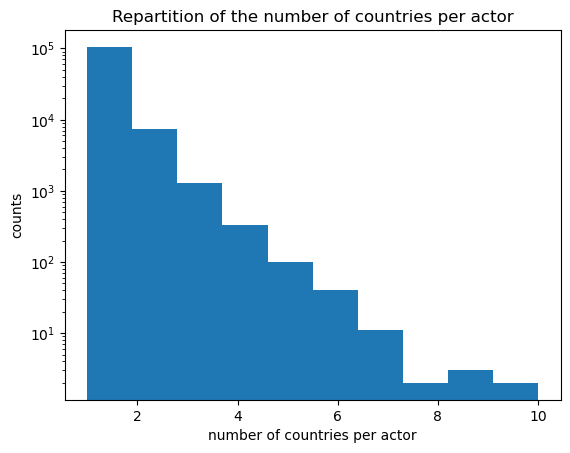

In [38]:
#dataframe containing only the single productions
single_prod_df = merged_df[merged_df['number_production_countries'] == 1]
print(len(single_prod_df))
print(len(merged_df))

# for each actor, counts the number of different countries in which they played
single_prod_grouped = single_prod_df.groupby(single_prod_df.actor_freebase_id)
number_countries_per_actor = single_prod_grouped['countries_freebase_id'].nunique() 

#let's plot the result
plt.hist(number_countries_per_actor, log=True)
plt.xlabel('number of countries per actor')
plt.ylabel('counts')
plt.title('Repartition of the number of countries per actor')
plt.show

In [34]:
#Computing the number of actors that have played in at least 2 countries in single production
international_actors = number_countries_per_actor[number_countries_per_actor > 1]

print("{} actors have played in at least 2 countries in single productions. It means in total our graphs will contain at least {} lines".format(len(international_actors), len(international_actors)))

9195 actors have played in at least 2 countries in single productions. It means in total our graphs will contain at least 9195 lines


2) Countries

In [10]:
# Compute the number of countries that are involved in the graph for single-productions 
# creating a data frame that only contains the lines with actors that played in several countries for single productions 
international_actors_df = pd.merge(single_prod_df, international_actors, on = 'actor_freebase_id')
international_actors_df.head()

,wiki_id,freebase_id,release_date,character,birth_date,gender,height,ethnicity_freebase_id,name,age,character_actor_freebase_id,character_freebase_id,actor_freebase_id,countries_freebase_id_x,number_production_countries,countries_freebase_id_y
0,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4,['/m/09c7w0'],1,2
1,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc,['/m/09c7w0'],1,2
2,975900,/m/03vyhn,2001-08-24,Whitlock,1945-08-02,F,1.753,NaN,Joanna Cassidy,56.0,/m/02vd6kw,/m/0bgchmx,/m/06lj1m,['/m/09c7w0'],1,2
3,975900,/m/03vyhn,2001-08-24,McSimms,1944-07-22,M,1.800,NaN,Peter Jason,57.0,/m/0bgchxd,/m/0bgchxh,/m/03d663h,['/m/09c7w0'],1,2
4,975900,/m/03vyhn,2001-08-24,Benchley,1935-08-13,M,NaN,NaN,Doug McGrath,66.0,/m/0bgcj4p,/m/0bgcj4s,/m/02r5d3j,['/m/09c7w0'],1,2


In [11]:
#compute the number of countries in which international actors have played
print(international_actors_df['countries_freebase_id_x'].nunique())

102


The graph will have 102 nodes corresponding to the 102 countries in which international actors have played

3. Links between countries and actors

In [20]:
import networkx as nx
from itertools import combinations, pairwise

In [14]:
# Creating a graph and adding one node for each country
G = nx.Graph()
G.add_nodes_from(international_actors_df['countries_freebase_id_x'].unique())

In [35]:
#associating each actor with the countries they played in
international_actors_df_grouped = international_actors_df.groupby(international_actors_df.actor_freebase_id)
countries_for_actor = international_actors_df_grouped['countries_freebase_id_x'].unique()


# Creating a function that create edges between countries in which an actor played
def createEdges(actor) :
    countries = countries_for_actor[actor]
    #countries_cleaned = [(country.strip("[]'\"")) for country in countries]
    #creates a list with all possible pairs of countries
    pairs = tuple(combinations(countries, 2))
    return pairs

# Adding the edges to the graph
for actor in international_actors_df['actor_freebase_id'].unique() :
    edge = createEdges(actor)
    G.add_edges_from(edge)
G.number_of_edges()

763

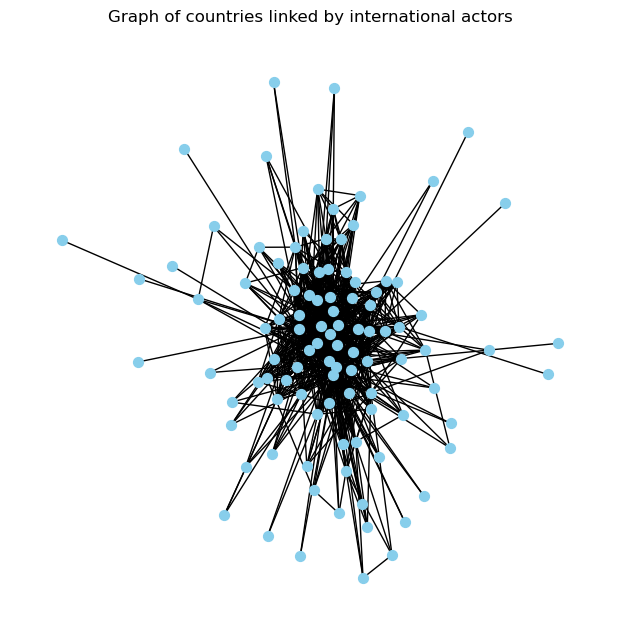

In [37]:
# Draw the graph
plt.figure(figsize=(6, 6))
nx.draw(G, with_labels=False, node_color='skyblue', node_size=50, font_size=6, width = 1)
plt.title("Graph of countries linked by international actors")
plt.show()

In [ ]:
G.number_of_edges()
list(G.edges)

[("['/m/09c7w0']", "['/m/0b90_r']"),
 ("['/m/09c7w0']", "['/m/059j2']"),
 ("['/m/09c7w0']", "['/m/03_3d']"),
 ("['/m/09c7w0']", "['/m/0d060g']"),
 ("['/m/09c7w0']", "['/m/07ssc']"),
 ("['/m/06mkj']", "['/m/0f8l9c']")]